In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest
import warnings
warnings.filterwarnings('ignore')  
from pyod.models.abod import ABOD
from pyod.models.loda import LODA

In [160]:
df=pd.read_csv('AS002.csv')

In [161]:
df=df[['From Date','PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)','NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']]

In [162]:
df['From Date']=pd.to_datetime(df['From Date'])

In [163]:
df=df.set_index('From Date')

In [164]:
df=df.dropna()
df=df[::15]

In [165]:
data=df[['PM2.5 (ug/m3)']].copy()

In [166]:
def metrics(data,anomal,feature='PM2.5 (ug/m3)'):
    general_var=data[feature].std()
    not_anomaly_var=data[feature][data[anomal]==0].std()
    result=(general_var/not_anomaly_var)

    return result
    

<Axes: >

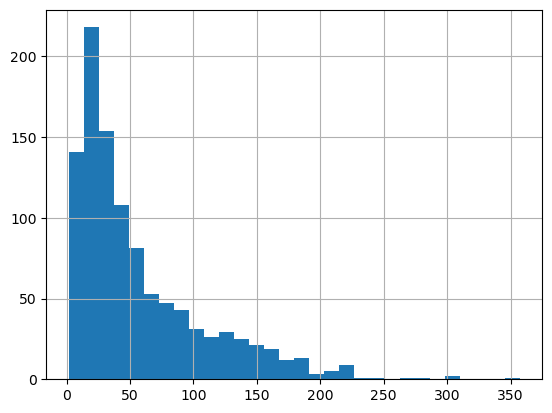

In [172]:
data['PM2.5 (ug/m3)'].hist(bins=30)

<Axes: xlabel='From Date'>

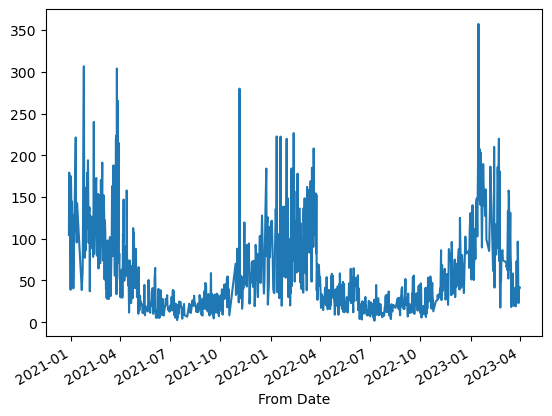

In [173]:
data['PM2.5 (ug/m3)'].plot()

In [167]:
def optimum(data,algo):
    try_data=data.copy()
    metric_list=list()
    for i in np.arange(0.000001,0.5,0.01):
        algo.contamination=i
        model=algo
        # model=algo(contamination=i)
        model.fit(try_data[['PM2.5 (ug/m3)']])
        try_data[f'anomal_{i}']= model.predict(try_data[['PM2.5 (ug/m3)']])
        metric_list.append(metrics(try_data,f'anomal_{i}'))
    plt.plot(np.arange(0,0.5,0.01), metric_list)
    plt.ylabel('Value of metrics')
    plt.xlabel('Contamination')
    plt.show()
    # return model

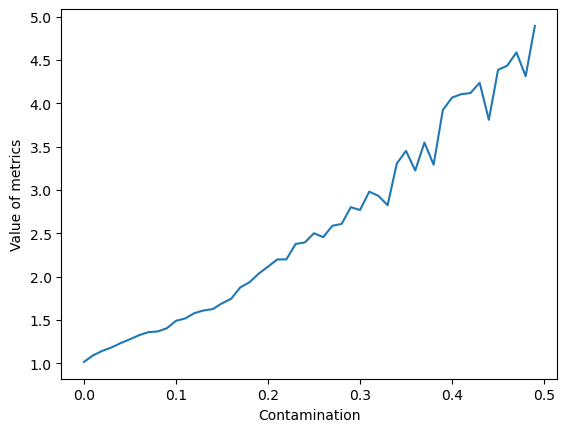

In [168]:
optimum(data,IForest())

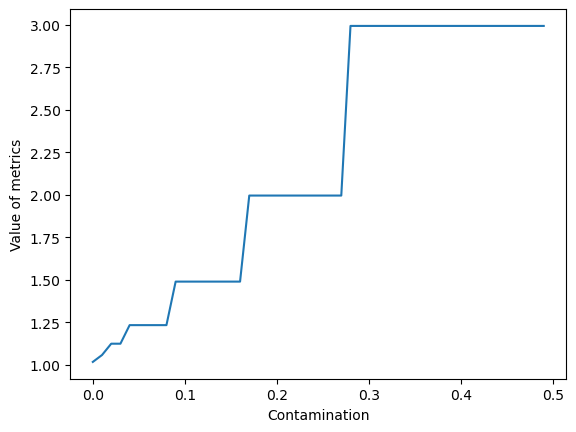

In [174]:
optimum(data,LODA())

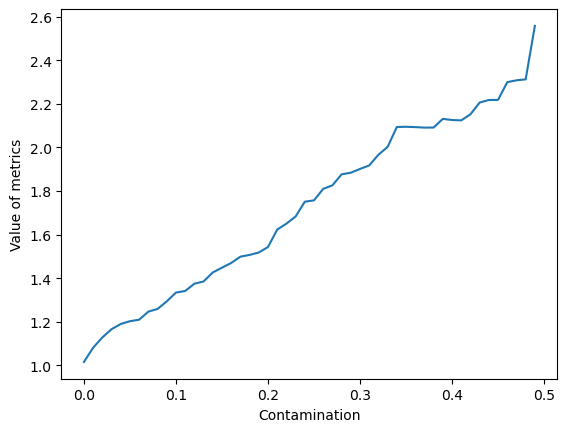

In [175]:
optimum(data,ABOD(method='fast', n_neighbors=10))